## Statistical Coverage Product viewer

This notebook makes timeseries plots of Peter May's Statistical Coverage Product as generated by derive_scp.py. It then separates the product into the different Pope regimes.

In [16]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates
import numpy as np
%matplotlib inline
import pandas

Input data path

In [17]:
scp_netcdf_file_path = '/home/rjackson/data/SCP.cdf'
pope_netcdf_file_path = '/home/rjackson/data/Drosdowsky.cdf'
mjo_index_file = '/home/rjackson/data/rmm.74toRealtime.txt'

Load netCDF variables

In [18]:
scp_netcdf = Dataset(scp_netcdf_file_path, mode='r')

years = scp_netcdf.variables['years'][:]
months = scp_netcdf.variables['months'][:]
days = scp_netcdf.variables['days'][:]
hours = scp_netcdf.variables['hours'][:]
minutes = scp_netcdf.variables['minutes'][:]
SCP0 = scp_netcdf.variables['SCP0'][:,:]
SCP10 = scp_netcdf.variables['SCP10'][:,:]
SCP20 = scp_netcdf.variables['SCP20'][:,:]
SCP30 = scp_netcdf.variables['SCP30'][:,:]
SCP40 = scp_netcdf.variables['SCP40'][:,:]
levels = scp_netcdf.variables['levels'][:]
scp_netcdf.close()

in_netcdf = Dataset(pope_netcdf_file_path)
year_p = in_netcdf.variables['year'][:]
month_p = in_netcdf.variables['month'][:]
day_p = in_netcdf.variables['day'][:]
groups_p = in_netcdf.variables['groups']

groups_mapped_to_scp = np.zeros(len(years))
mjo_index_mapped_to_scp = np.zeros(len(years))
data = pandas.read_csv(mjo_index_file,
                       header=2,
                       delim_whitespace=True)
data_matrix = np.ma.array(data.values)
year = data_matrix[:,0]
month = data_matrix[:,1]
day = data_matrix[:,2]
mjo = data_matrix[:,5]
mjo[mjo > 99].mask = True

for i in range(0, len(years)):
    index = np.logical_and(year_p == years[i], 
                           np.logical_and(month_p == months[i],  
                                          day_p == days[i]))
    index = np.where(index == True)
    index = index[0]
    if(len(index) > 0):
        groups_mapped_to_scp[i] = groups_p[index[0]]
    else:
        groups_mapped_to_scp[i] = float('nan') 
    index = np.logical_and(year == years[i], 
                           np.logical_and(month == months[i],  
                                          day == days[i])) 
    index = np.where(index == True)
    index = index[0]
    if(len(index) > 0):
        mjo_index_mapped_to_scp[i] = mjo[index[0]]
    else:
        mjo_index_mapped_to_scp[i] = float('nan') 

Display statistical coverage product

In [20]:
bins_10 = np.linspace(0,100,20)
bins_20 = np.linspace(0,100,20)
bins_30 = np.linspace(0,50,20)
bins_40 = np.linspace(0,50,20)
SCP0_hist = np.zeros((len(levels), 5, len(bins_10)-1))
SCP10_hist = np.zeros((len(levels), 5, len(bins_10)-1))
SCP20_hist = np.zeros((len(levels), 5, len(bins_20)-1))
SCP30_hist = np.zeros((len(levels), 5, len(bins_30)-1))
SCP40_hist = np.zeros((len(levels), 5, len(bins_40)-1))
SCP0_hist14 = np.zeros((len(levels), 5, len(bins_10)-1))
SCP10_hist14 = np.zeros((len(levels), 5, len(bins_10)-1))
SCP20_hist14 = np.zeros((len(levels), 5, len(bins_20)-1))
SCP30_hist14 = np.zeros((len(levels), 5, len(bins_30)-1))
SCP40_hist14 = np.zeros((len(levels), 5, len(bins_40)-1))
SCP0_hist58 = np.zeros((len(levels), 5, len(bins_10)-1))
SCP10_hist58 = np.zeros((len(levels), 5, len(bins_10)-1))
SCP20_hist58 = np.zeros((len(levels), 5, len(bins_20)-1))
SCP30_hist58 = np.zeros((len(levels), 5, len(bins_30)-1))
SCP40_hist58 = np.zeros((len(levels), 5, len(bins_40)-1))
for i in range(0,2):
    for j in range(0, len(levels)):
        in_group = np.logical_and(groups_mapped_to_scp == i,
                                  SCP10[:,1] > 1)
        mjo_1to4 = np.logical_or(mjo_index_mapped_to_scp == 8,
                                  mjo_index_mapped_to_scp <= 3)
        mjo_5to8 = np.logical_and(mjo_index_mapped_to_scp >= 4,
                                  mjo_index_mapped_to_scp <= 7)
        hist, bins = np.histogram(SCP0[np.where(in_group),j],
                                  bins=bins_10,
                                  normed=True)
        SCP0_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP10[np.where(in_group),j],
                                  bins=bins_10,
                                  normed=True)
        SCP10_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP20[np.where(in_group),j],
                                  bins=bins_20,
                                  normed=True)
        SCP20_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP30[np.where(in_group),j],
                                  bins=bins_30,
                                  normed=True)
        SCP30_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP40[np.where(in_group),j],
                                  bins=bins_40,
                                  normed=True)
        SCP40_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP0[np.where(np.logical_and(in_group, 
                                                                mjo_1to4)),j],
                                  bins=bins_10,
                                  normed=True)
        SCP0_hist14[j,i,:] = hist
        hist, bins = np.histogram(SCP10[np.where(np.logical_and(in_group, 
                                                                mjo_1to4)),j],
                                  bins=bins_10,
                                  normed=True)
        SCP10_hist14[j,i,:] = hist
        hist, bins = np.histogram(SCP20[np.where(np.logical_and(in_group,
                                                                mjo_1to4)),j],
                                  bins=bins_20,
                                  normed=True)
        SCP20_hist14[j,i,:] = hist
        hist, bins = np.histogram(SCP30[np.where(np.logical_and(in_group,
                                                                mjo_1to4)),j],
                                  bins=bins_30,
                                  normed=True)
        SCP30_hist14[j,i,:] = hist
        hist, bins = np.histogram(SCP40[np.where(np.logical_and(in_group,
                                                                mjo_1to4)),j],
                                  bins=bins_40,
                                  normed=True)
        SCP40_hist14[j,i,:] = hist
        hist, bins = np.histogram(SCP0[np.where(np.logical_and(in_group,
                                                                mjo_5to8)),j],
                                  bins=bins_10,
                                  normed=True)
        SCP0_hist58[j,i,:] = hist
        hist, bins = np.histogram(SCP10[np.where(np.logical_and(in_group,
                                                                mjo_5to8)),j],
                                  bins=bins_10,
                                  normed=True)
        SCP10_hist58[j,i,:] = hist
        hist, bins = np.histogram(SCP20[np.where(np.logical_and(in_group,
                                                                mjo_5to8)),j],
                                  bins=bins_20,
                                  normed=True)
        SCP20_hist58[j,i,:] = hist
        hist, bins = np.histogram(SCP30[np.where(np.logical_and(in_group,
                                                                mjo_5to8)),j],
                                  bins=bins_30,
                                  normed=True)
        SCP30_hist58[j,i,:] = hist
        hist, bins = np.histogram(SCP40[np.where(np.logical_and(in_group,
                                                                mjo_5to8)),j],
                                  bins=bins_40,
                                  normed=True)
        SCP40_hist58[j,i,:] = hist                                

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


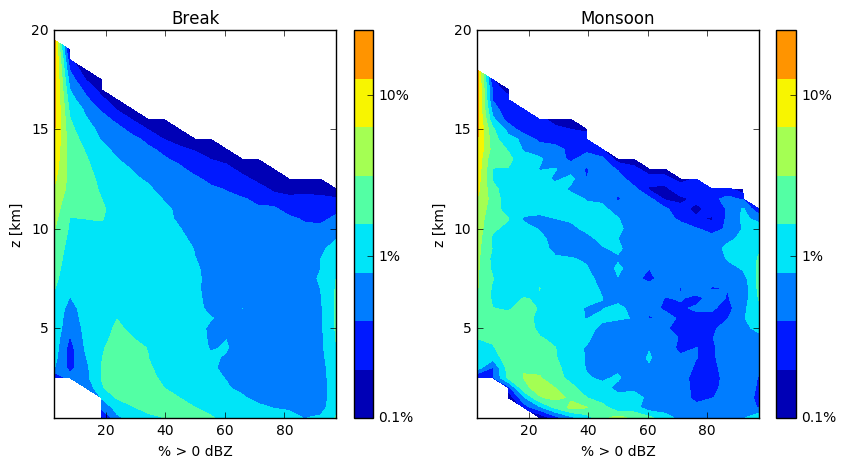

In [5]:
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
SCP0_hist[SCP0_hist < 0.001] = np.nan
XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Break')

plt.subplot(122)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%']) 
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon')


/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


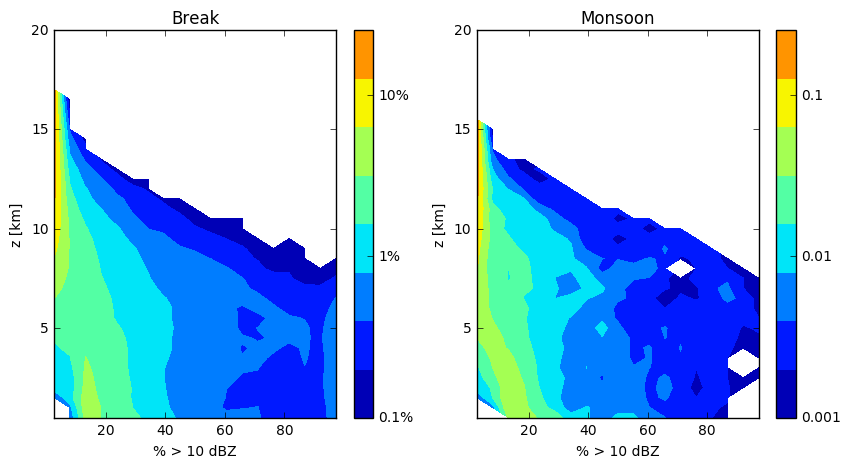

In [6]:
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
SCP10_hist[SCP10_hist < 0.001] = np.nan
XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Break')

plt.subplot(122)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon')


/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


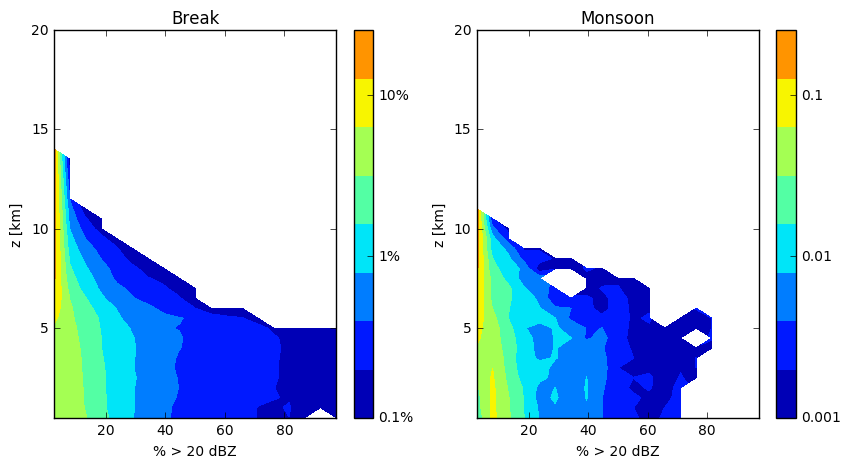

In [7]:
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
SCP20_hist[SCP20_hist < 0.001] = np.nan
XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Break')

plt.subplot(122)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon')


/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


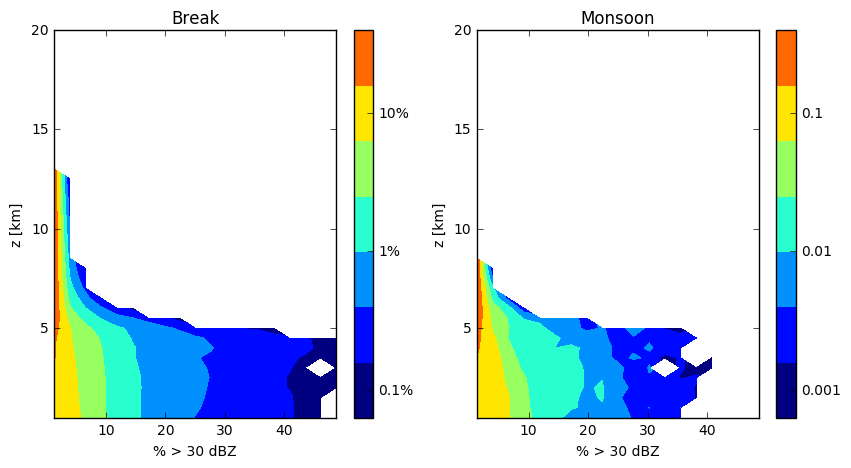

In [8]:
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
SCP30_hist[SCP30_hist < 0.001] = np.nan
XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Break')

plt.subplot(122)
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon')


/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10


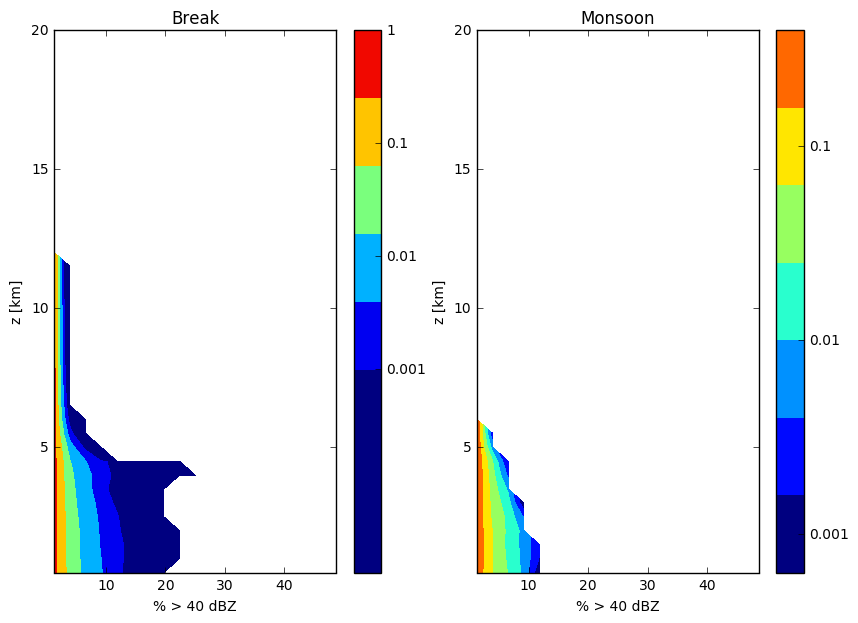

In [9]:
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Break')

plt.subplot(122)
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon')


/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


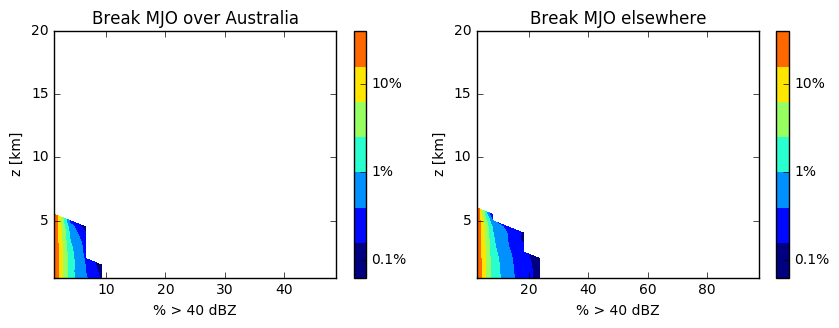

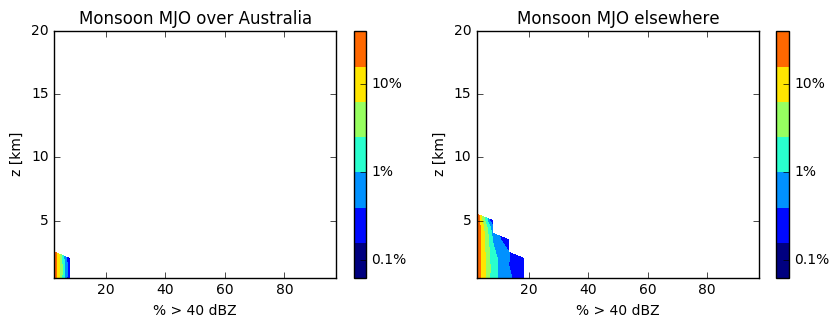

In [24]:
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
SCP40_hist14[SCP40_hist14 < 0.001] = np.nan
SCP40_hist58[SCP40_hist58 < 0.001] = np.nan

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist14[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO over Australia')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist58[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO elsewhere')

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist14[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO over Australia')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist58[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO elsewhere')

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


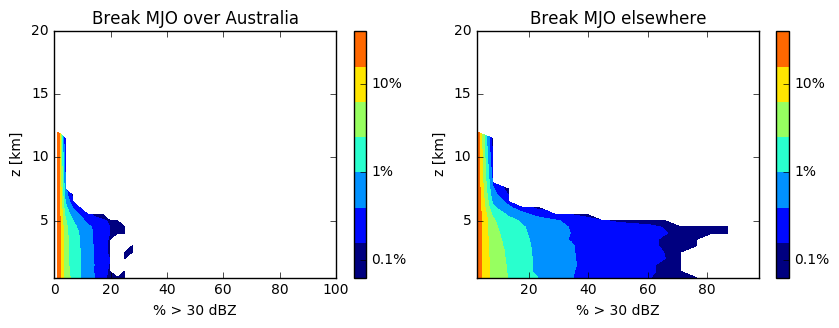

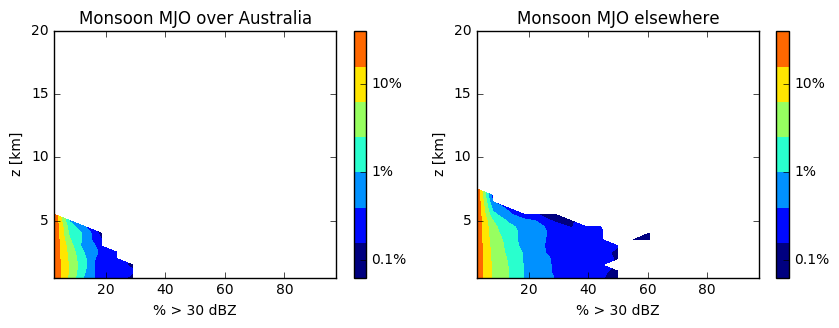

In [31]:
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
SCP30_hist14[SCP30_hist14 < 0.001] = np.nan
SCP30_hist58[SCP30_hist58 < 0.001] = np.nan

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist14[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
plt.xlim([0,100])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO over Australia')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist58[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO elsewhere')

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist14[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO over Australia')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist58[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO elsewhere')

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


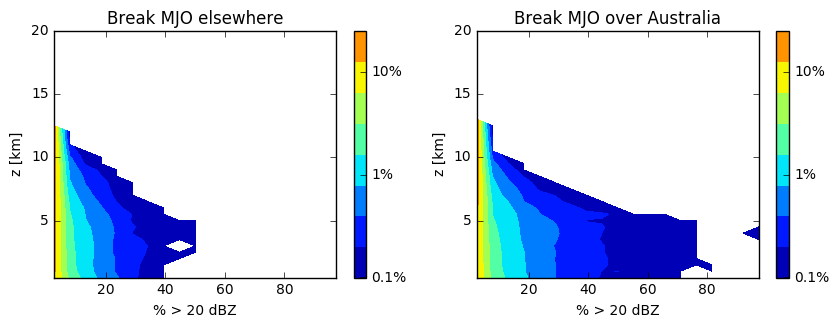

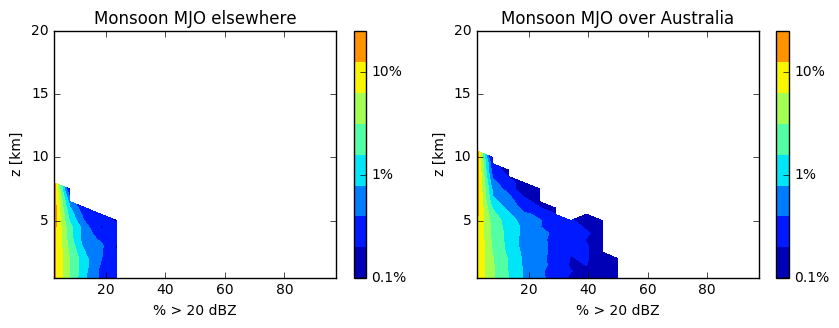

In [27]:
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
SCP20_hist14[SCP20_hist14 < 0.001] = np.nan
SCP20_hist58[SCP20_hist58 < 0.001] = np.nan

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist14[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist58[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO over Australia')

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist14[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist58[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO over Australia')

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


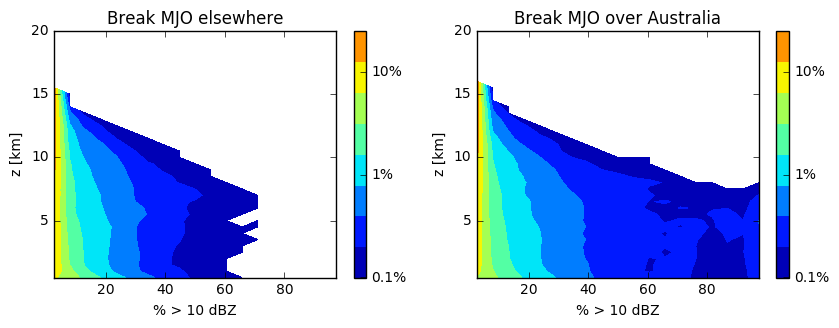

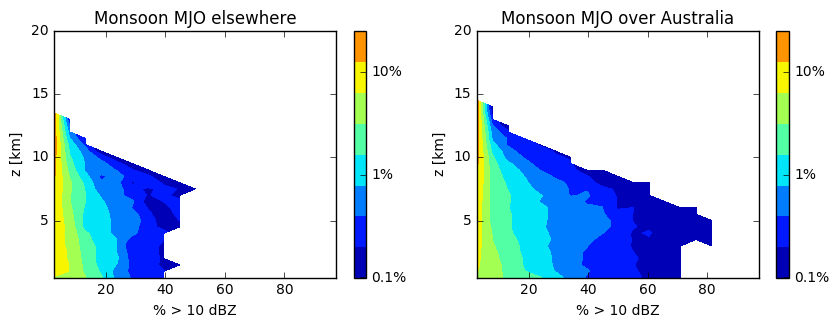

In [28]:
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
SCP10_hist14[SCP10_hist14 < 0.001] = np.nan
SCP10_hist58[SCP10_hist58 < 0.001] = np.nan

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist14[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist58[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO over Australia')

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist14[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist58[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO over Australia')

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


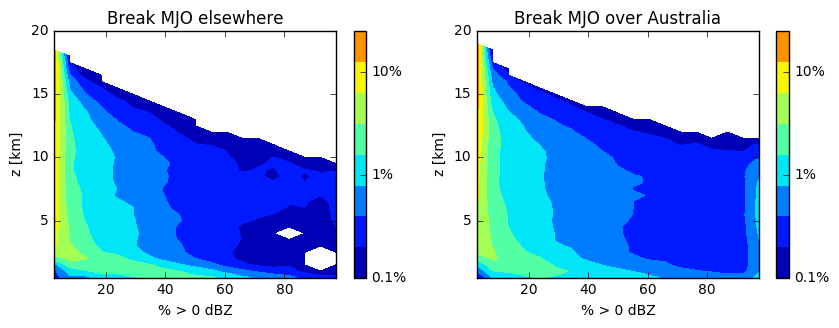

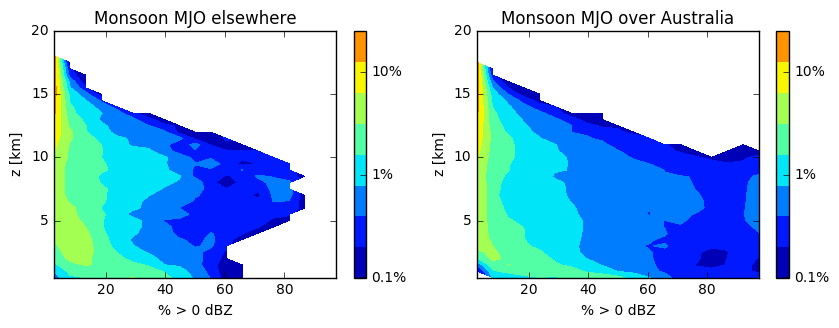

In [30]:
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
SCP0_hist14[SCP0_hist14 < 0.001] = np.nan
SCP0_hist58[SCP0_hist58 < 0.001] = np.nan

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist14[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist58[:,0,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])  
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Break MJO over Australia')

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist14[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO elsewhere')

plt.subplot(222)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP0_hist58[:,1,:])),
             vmin=-3,vmax=0)
ax = plt.colorbar(ticks=[-3, -2, -1, 0])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.1%', '1%', '10%','100%'])   
plt.xlabel('% > 0 dBZ')
plt.ylabel('z [km]')
plt.title('Monsoon MJO over Australia')